# Fashion Mnist Classification

Imports

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

Loading and Visualizing the data

https://github.com/zalandoresearch/fashion-mnist

In [ ]:
data  = keras.datasets.fashion_mnist
((x_train, y_train), (x_test,y_test)) = data.load_data() #returns a tuple with train and test data

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
classes = ['T-shirt/top',
	'Trouser',
	'Pullover',
	'Dress',
	'Coat',
	'Sandal',
	'Shirt',
	'Sneaker',
	'Bag',
	'Ankle boot']

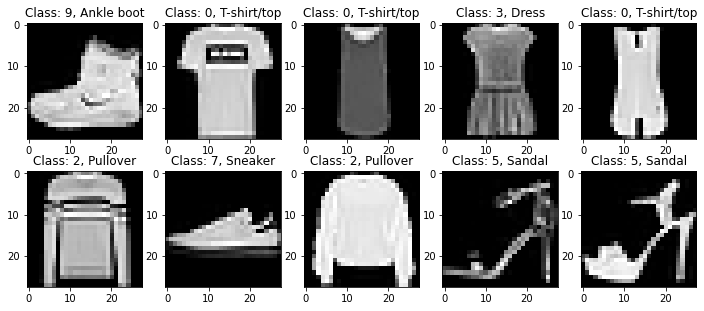

In [ ]:
plt.figure(figsize=[12,5])
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Class: {y_train[i]}, {classes[y_train[i]]}")

Image Normalization

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

Creating the Model (with Fully connected dense layer)

In [ ]:
BATCH_SIZE = 128
IMG_SIZE = x_train.shape[1]
N_CLASSES = len(classes)
EPOCHS = 30

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (IMG_SIZE, IMG_SIZE)))
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(N_CLASSES, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)
history = model.fit(x_train, y_train,batch_size = BATCH_SIZE, validation_data = (x_test,y_test), epochs = EPOCHS, callbacks = callback )

Epoch 1/30
469/469 [==============================] - 6s 4ms/step - loss: 0.5252 - accuracy: 0.8150 - val_loss: 0.4351 - val_accuracy: 0.8442
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3854 - accuracy: 0.8618 - val_loss: 0.3950 - val_accuracy: 0.8575
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8725 - val_loss: 0.3724 - val_accuracy: 0.8644
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8803 - val_loss: 0.3610 - val_accuracy: 0.8711
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.8868 - val_loss: 0.3488 - val_accuracy: 0.8740
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2962 - accuracy: 0.8902 - val_loss: 0.3475 - val_accuracy: 0.8722
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2808 - accuracy: 0.8951 - val_loss: 0.3469 - val_accuracy: 0.8713
Epoch 

Text(0.5, 1.0, 'Accuracy')

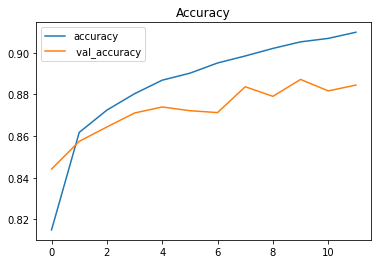

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy',' val_accuracy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

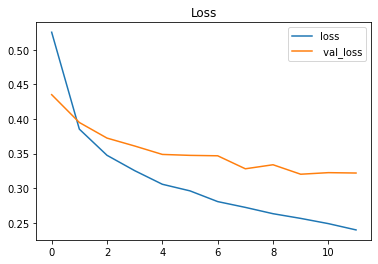

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss',' val_loss'])
plt.title('Loss')

Predicting Images

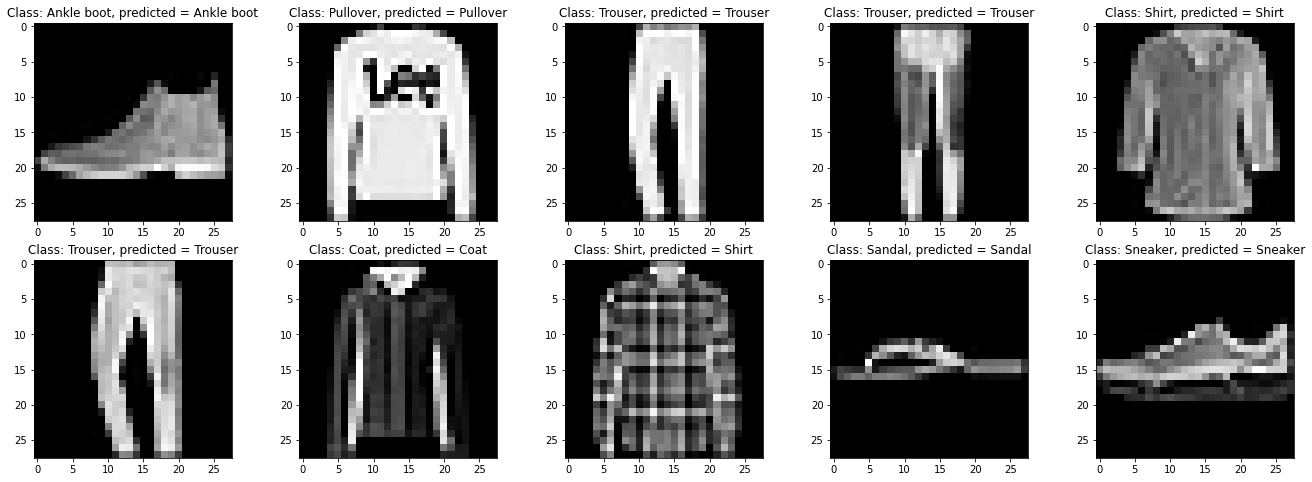

In [ ]:
plt.figure(figsize=[23,8])
predicted = model.predict(x_test)
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Class: {classes[y_test[i]]}, predicted = {classes[np.argmax(predicted[i])]}")

Creating the Model (with CNN feature extraction)

In [ ]:
BATCH_SIZE = 128
IMG_SIZE = x_train.shape[1]
N_CLASSES = len(classes)
EPOCHS = 30

In [ ]:
cnnmodel = keras.Sequential()
cnnmodel.add(keras.layers.Input(shape = [IMG_SIZE, IMG_SIZE, 1]))
cnnmodel.add(keras.layers.Conv2D(filters = 256, kernel_size = (2,2),padding = 'same',activation ='relu'))
cnnmodel.add(keras.layers.Conv2D(filters = 256, kernel_size = (2,2),padding = 'same',activation = 'relu'))
cnnmodel.add(keras.layers.AveragePooling2D((2,2)))
cnnmodel.add(keras.layers.Dropout(0.2))
cnnmodel.add(keras.layers.Flatten())
cnnmodel.add(keras.layers.Dense(N_CLASSES, activation = 'softmax'))

In [ ]:
cnnmodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)
history = cnnmodel.fit(x_train, y_train,batch_size = BATCH_SIZE, validation_data = (x_test,y_test), epochs = EPOCHS, callbacks = callback )

Epoch 1/30
469/469 [==============================] - 39s 65ms/step - loss: 0.4324 - accuracy: 0.8476 - val_loss: 0.3458 - val_accuracy: 0.8785
Epoch 2/30
469/469 [==============================] - 30s 65ms/step - loss: 0.2872 - accuracy: 0.8977 - val_loss: 0.3201 - val_accuracy: 0.8831
Epoch 3/30
469/469 [==============================] - 30s 65ms/step - loss: 0.2491 - accuracy: 0.9113 - val_loss: 0.2686 - val_accuracy: 0.9002
Epoch 4/30
469/469 [==============================] - 30s 64ms/step - loss: 0.2212 - accuracy: 0.9212 - val_loss: 0.2522 - val_accuracy: 0.9122
Epoch 5/30
469/469 [==============================] - 31s 66ms/step - loss: 0.2000 - accuracy: 0.9280 - val_loss: 0.2541 - val_accuracy: 0.9113
Epoch 6/30
469/469 [==============================] - 30s 64ms/step - loss: 0.1815 - accuracy: 0.9340 - val_loss: 0.2398 - val_accuracy: 0.9146
Epoch 7/30
469/469 [==============================] - 31s 66ms/step - loss: 0.1670 - accuracy: 0.9394 - val_loss: 0.2430 - val_accuracy:

In [ ]:
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       262400    
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 256)      0         
 ooling2D)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 256)       0         
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                501770    
                                                      

Text(0.5, 1.0, 'Accuracy')

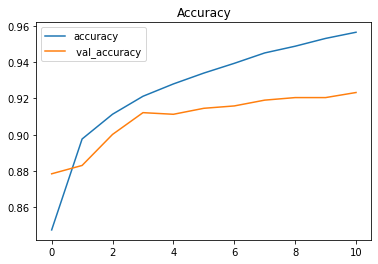

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy',' val_accuracy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

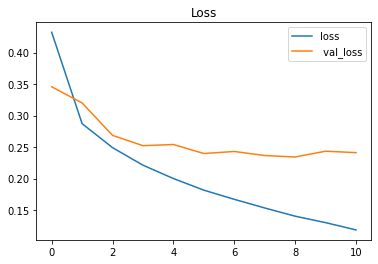

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss',' val_loss'])
plt.title('Loss')

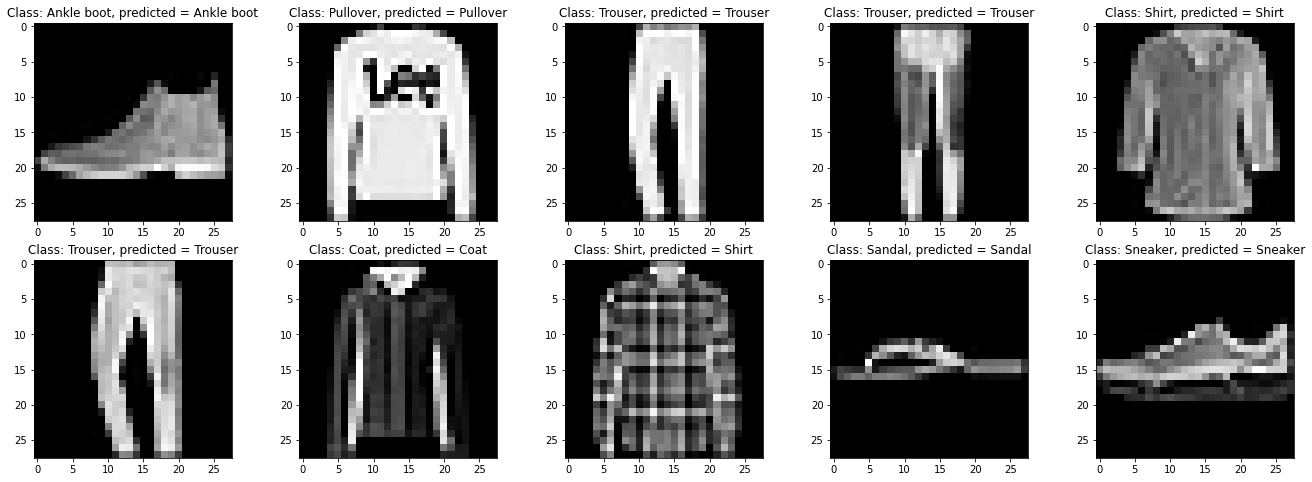

In [ ]:
plt.figure(figsize=[23,8])
predicted = cnnmodel.predict(x_test)
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Class: {classes[y_test[i]]}, predicted = {classes[np.argmax(predicted[i])]}")